In [40]:
import xgboost as xgb
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [41]:
market_train = pd.read_csv('marketdata_sample.csv')
market_train

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,1.0,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,0.0,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1.0,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,1.0,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1.0,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2007-02-01 22:00:00+00:00,APH.N,Amphenol Corp,1.0,473600.0,67.78,67.81,0.000886,0.019086,NaN,NaN,0.052321,0.041308,NaN,NaN,-0.012906
96,2007-02-01 22:00:00+00:00,APKT.O,Acme Packet Inc,0.0,876166.0,15.15,16.01,-0.045970,-0.030872,NaN,NaN,-0.158333,-0.119217,NaN,NaN,0.136984
97,2007-02-01 22:00:00+00:00,APOL.O,Apollo Education Group Inc,1.0,1705126.0,42.96,43.40,-0.010138,0.009302,NaN,NaN,0.040698,0.051357,NaN,NaN,0.064169
98,2007-02-01 22:00:00+00:00,APPB.O,Applebee's International Inc,1.0,2487535.0,24.58,24.73,-0.026149,-0.010404,NaN,NaN,0.000000,-0.005629,NaN,NaN,0.068776


In [42]:
drop_list = ['AAI.N',
'ABD.N',
'ABV.N',
'ABY.N',
'ACF.N',
'ACH.N',
'ACL.N',
'ACS.N',
'ACTS.O',
'AD.N',
'ADCT.O',
'ADI.N',
'ADP.N',
'AEA.N',
'AEOS.O',
'AFFX.O',
'AFR.N',
'AGE.N',
'AH.N',
'AHG.N',
'AHS.N',
'AIN.N',
'AIT.N',
'ALD.N',
'ALO.N',
'ALU.N',
'AMD.N',
'AMLN.O',
'AMMD.O',
'ANDE.O',
'ANDW.O',
'ANR.N',
'AOC.N',
'APKT.O',
'APPB.O',
'AQNT.O',
'ARG.N',
'ARXT.O',
'ARXX.O',
'ASBC.O',
'ASCA.O',
'ASN.N',
'AT.N',
'ATHR.O',
'ATMI.O',
'ATML.O',
'ATPG.O',
'ATRS.O',
'AV.N',
'AVCT.O',
'AW.N',
'AXE.N',
'AXR.N',
'AYE.N',
'BBV.N',
'BDK.N',
'BEAS.O',
'BEC.N',
'BEE.N',
'BER.N',
'BEZ.N',
'BGP.N',
'BHS.N',
'BJ.N',
'BJS.N',
'BKC.N',
'BLC.N',
'BLG.N',
'BLUD.O',
'BMC.N',
'BMET.O',
'BMR.N',
'BNI.N',
'BNK.N',
'BOBJ.O',
'BOL.N',
'BOT.N',
'BOW.N',
'BQI.A',
'BRC.N',
'BRCM.O',
'BRE.N',
'BRL.N',
'BRS.N',
'BRY.N',
'BSC.N',
'BSG.N',
'BUCY.O',
'BWS.N',
'CA.N',
'CAI.N',
'CAM.N',
'CAO.N',
'CAR.N',
'CBH.N',
'CBK.N',
'CBSS.O',
'CBST.O',
'CCU.N',
'CDR.N',
'CDWC.O',
'CEG.N',
'CEI.N',
'CEN.N',
'CENT.O',
'CEO.N',
'CEPH.O',
'CFC.N',
'CG.N',
'CHAP.O',
'CHE.N',
'CHH.N',
'CHIC.O',
'CIEN.O',
'CKFR.O',
'CKH.N',
'CKR.N',
'CLE.N',
'CLP.N',
'CMCSK.O',
'CMED.O',
'CMGb.N',
'CMVT.OQ',
'CMX.N',
'CNE.N',
'CNET.O',
'CNL.N',
'CNS.N',
'CNW.N',
'COCO.O',
'COGN.O',
'COGT.O',
'COMS.O',
'CPS.N',
'CPWR.O',
'CPX.N',
'CQB.N',
'CRA.N',
'CRDN.O',
'CRR.N',
'CSE.N',
'CSH.N',
'CSX.N',
'CTCM.O',
'CTV.N',
'CTX.N',
'CVC.N',
'CVD.N',
'CVH.N',
'CVTX.O',
'CXG.N',
'CY.N',
'CYMI.O',
'CYN.N',
'CYT.N',
'CYTC.O',
'DADE.O',
'DAKT.O',
'DCEL.O',
'DELL.O',
'DIGE.O',
'DIVX.O',
'DJ.N',
'DLM.N',
'DLP.N',
'DNA.N',
'DOX.N',
'DPL.N',
'DQE.N',
'DRC.N',
'DRIV.O',
'DTG.N',
'DWA.N',
'EAC.N',
'EAGL.O',
'EAS.N',
'ECLP.O',
'EDS.N',
'EE.N',
'EFD.N',
'ELK.N',
'ELN.N',
'ELOS.O',
'ELX.N',
'EMC.N',
'ENN.N',
'EP.N',
'EPIC.O',
'EQ.N',
'ERTS.O',
'ESE.N',
'EYE.N',
'FCL.N',
'FCS.N',
'FDO.N',
'FDRY.O',
'FEIC.O',
'FIC.N',
'FLML.O',
'FMCN.O',
'FMER.O',
'FNFG.O',
'FRK.N',
'FRX.N',
'FTO.N',
'GAP.N',
'GAS.N',
'GBBK.O',
'GDP.N',
'GENZ.O',
'GGL.N',
'GI.N',
'GLS.N',
'GLT.N',
'GMR.N',
'GMST.O',
'GMT.N',
'GNA.N',
'GR.N',
'GRP.N',
'GSIC.O',
'GSS.A',
'GT.N',
'GTI.N',
'GTRC.O',
'GTW.N',
'GW.A',
'GYI.N',
'GYMB.O',
'HAS.N',
'HBC.N',
'HC.N',
'HCBK.O',
'HCR.N',
'HET.N',
'HEW.N',
'HGSI.O',
'HIH.N',
'HLYS.O',
'HMA.N',
'HME.N',
'HMN.N',
'HNT.N',
'HNZ.N',
'HOS.N',
'HOT.N',
'HOV.N',
'HPC.N',
'HPT.N',
'HSP.N',
'HUBb.N',
'HXM.N',
'HYDL.O',
'HYSL.O',
'ICO.N',
'ICON.O',
'ID.N',
'IFIN.O',
'IFS.N',
'IKN.N',
'ILA.N',
'IM.N',
'IMCL.O',
'IN.N',
'INFA.O',
'INFY.O',
'INWK.O',
'IPCR.O',
'IPS.N',
'IRC.N',
'IRF.N',
'ISE.N',
'ISIS.O',
'ISLE.O',
'ITG.N',
'ITMN.O',
'IWA.N',
'IWOV.O',
'JAH.N',
'JBX.N',
'JCG.N',
'JH.N',
'JNC.N',
'JNPR.O',
'KCI.N',
'KDN.N',
'KEA.N',
'KFN.N',
'KG.N',
'KKD.N',
'KMP.N',
'KOMG.O',
'KPA.N',
'KRY.A',
'KSE.N',
'KTC.N',
'KWD.N',
'KWK.N',
'KYPH.O',
'LAUR.O',
'LCAV.O',
'LCC.N',
'LDG.N',
'LEAP.O',
'LEE.N',
'LEND.O',
'LFB.N',
'LGF.N',
'LI.N',
'LIFC.O',
'LKQX.O',
'LNCR.O',
'LRY.N',
'LSS.N',
'LTR.N',
'LWSN.O',
'LXK.N',
'LYO.N',
'LZ.N',
'MAR.N',
'MAT.N',
'MATK.O',
'MCCC.O',
'MCGC.O',
'MCRL.O',
'ME.N',
'MEDI.O',
'MEDX.O',
'MEE.N',
'MEL.N',
'MER.N',
'MFE.N',
'MGLN.O',
'MHS.N',
'MIL.N',
'MIR.N',
'MLNM.O',
'MLS.N',
'MOGN.O',
'MOLX.O',
'MPG.N',
'MPS.N',
'MR.N',
'MRBK.O',
'MRD.N',
'MRH.N',
'MRX.N',
'MSTR.O',
'MTD.N',
'MU.N',
'MVL.N',
'MW.N',
'MWAb.N',
'MWV.N',
'MYL.N',
'NAL.N',
'NCC.N',
'NCX.N',
'NDN.N',
'NFP.N',
'NFS.N',
'NHP.N',
'NITE.O',
'NLC.N',
'NMR.N',
'NMX.N',
'NNI.N',
'NOVL.O',
'NRPH.O',
'NST.N',
'NTY.N',
'NVL.N',
'NWY.N',
'NX.N',
'NXG.A',
'NXL.N',
'NXY.N',
'NYB.N',
'OCAS.O',
'OCN.N',
'OCR.N',
'ODP.N',
'OMAB.O',
'OMG.N',
'OMM.N',
'OMTR.O',
'ONB.N',
'ONNN.O',
'OO.N',
'OPSW.O',
'ORB.N',
'ORCL.O',
'ORH.N',
'OSI.N',
'OSIP.O',
'OVTI.O',
'OXPS.O',
'PACR.O',
'PALM.O',
'PAS.N',
'PBG.N',
'PBY.N',
'PCH.N',
'PCL.N',
'PCP.N',
'PCU.N',
'PD.N',
'PDE.N',
'PDLI.O',
'PER.N',
'PETM.O',
'PFCB.O',
'PGI.N',
'PGL.N',
'PHRM.O',
'PL.N',
'PLCM.O',
'PLL.N',
'PLLL.O',
'PLT.N',
'PMCS.O',
'PMI.N',
'PMTI.O',
'PNK.N',
'PNY.N',
'POM.N',
'POS.N',
'PPDI.O',
'PPP.N',
'PPS.N',
'PRE.N',
'PRX.N',
'PSD.N',
'PSSI.O',
'PSUN.O',
'PSYS.O',
'PTR.N',
'PTRY.O',
'PTV.N',
'PXP.N',
'PYX.N',
'QLGC.O',
'QSFT.O',
'RBN.N',
'RCII.O',
'RDA.N',
'RFMD.O',
'RGS.N',
'RKT.N',
'ROH.N',
'RSH.N',
'RTI.N',
'RTP.N',
'RVBD.O',
'RVI.N',
'RX.N',
'RYI.N',
'RYL.N',
'SAF.N',
'SAH.N',
'SAPE.O',
'SAY.N',
'SBIB.O',
'SCHW.O',
'SCRX.O',
'SEPR.O',
'SFC.N',
'SFD.N',
'SFI.N',
'SHPGY.O',
'SIAL.O',
'SIE.N',
'SII.N',
'SIL.A',
'SIMG.O',
'SIRF.O',
'SKIL.O',
'SKS.N',
'SKYF.O',
'SLM.N',
'SLR.N',
'SMOD.O',
'SNDA.O',
'SNDK.O',
'SNH.N',
'SNP.N',
'SOV.N',
'SPIL.O',
'SRX.N',
'SRZ.N',
'SSI.N',
'STEI.O',
'STJ.N',
'STN.N',
'STP.N',
'STR.N',
'STTS.O',
'SUG.N',
'SVM.N',
'SVVS.O',
'SWFT.O',
'SWS.N',
'SWY.N',
'SY.N',
'TAM.N',
'TBL.N',
'TDW.N',
'TE.N',
'TEK.N',
'TEVA.O',
'TG.N',
'THE.N',
'THOR.O',
'THX.N',
'TIBX.O',
'TIE.N',
'TIN.N',
'TKLC.O',
'TLAB.O',
'TLB.N',
'TLM.N',
'TM.N',
'TMX.N',
'TNB.N',
'TNE.N',
'TNOX.O',
'TQNT.O',
'TRA.N',
'TRB.N',
'TRID.O',
'TRW.N',
'TRYb.N',
'TSG.N',
'TSY.N',
'TTI.N',
'TUES.O',
'TWB.N',
'TXI.N',
'TXN.N',
'TXU.N',
'TZIX.O',
'UAPH.O',
'UB.N',
'UBB.N',
'UCO.N',
'UEPS.O',
'UPL.A',
'URS.N',
'USPI.O',
'UST.N',
'UTI.N',
'UTIW.O',
'UVN.N',
'VCI.N',
'VIAb.N',
'VOL.N',
'VPHM.O',
'VRGY.O',
'VRX.N',
'VSEA.O',
'WAG.N',
'WB.N',
'WBSN.O',
'WDC.N',
'WEBX.O',
'WEN.N',
'WFSL.O',
'WL.N',
'WMG.N',
'WMI.N',
'WTS.N',
'WW.N',
'WWY.N',
'XMSR.O',
'XTO.N',
'ZGEN.O',
'ZLC.N',
'ZMH.N',
'ZQK.N',
'ZRAN.O',
'ZUMZ.O',
'ZZ.N',
'CHZ.N',
'PTP.N',
'TSFG.O',
'WITS.O',
'BSTE.O',
'DSX.N',
'MOLXA.O',
'VMSI.O',
'GRT.N',
'ILSE.O',
'IVC.N',
'SVNT.O',
'PAC.N',
'RG.N',
'CBEY.O',
'PJC.N',
'VOLC.O',
'CNH.N',
'MCRS.O',
'GLBC.O',
'SYX.N',
'USIH.O',
'NAVZ.OQ',
'TWGP.O',
'FRPT.O',
'ITC.N',
'KNXA.O',
'ESL.N',
'KSWS.O',
'TDY.N',
'PXR.N',
'CCO.N',
'CEC.N',
'GISX.O',
'KRON.O',
'PTNR.O',
'NAK.A',
'ROIAK.O',
'SLXP.O',
'ARBA.O',
'HLIT.O',
'NEWP.O',
'ZNT.N',
'QMAR.O',
'DECK.O',
'ZOLT.O',
'CCBL.O',
'MTX.N',
'BPT.N',
'ASPV.O',
'BBBB.O',
'GCA.N',
'RAH.N',
'IDC.N',
'SIM.A',
'VMED.O',
'CHTT.O',
'RAIL.O',
'WLSC.O',
'AMIS.O',
'MINI.O',
'STKL.O',
'TCK.N',
'DJO.N',
'TALX.O',
'HRH.N',
'EIG.N',
'ONXX.O',
'USTR.O',
'ARD.N',
'IFSIA.O',
'ALSK.O',
'GFIG.O',
'TEG.N',
'AGYS.O',
'FS.N',
'HBG.N',
'NPO.N',
'RJET.O',
'GLDN.O',
'ARAY.O',
'NETC.O',
'FLA.N',
'TI.N',
'CEDC.O',
'SMRT.O',
'SVR.N',
'TDS.A',
'VTIV.O',
'XTXI.O',
'OPXT.O',
'PGNX.O',
'NTO.A',
'SEH.N',
'JRN.N',
'PTMK.O',
'SIGM.O',
'XNPT.O',
'BARE.O',
'BKMU.O',
'MYE.N',
'PRSP.O',
'VARI.O',
'ANAD.O',
'USNA.O',
'ACO.N',
'RECN.O',
'DRTE.O',
'ISLN.O',
'SGG.O',
'WNG.N',
'WRES.O',
'MEG.N',
'PIR.N',
'USBE.O',
'HNP.N',
'JAS.N',
'BBND.O',
'CYCL.O',
'FCSX.O',
'RNO.A',
'SMSC.O',
'DNDN.O',
'GHCI.O',
'JOSB.O',
'ROSE.O',
'NEU.N',
'RIN.O',
'RT.N',
'CPHD.O',
'CVNS.O',
'TNH.N',
'RESP.O',
'JAKK.O',
'EVVV.O',
'KTO.N',
'MNG.A',
'NM.N',
'WPP.N',
'CELL.O',
'LOOP.O',
'FELE.O',
'CNQR.O',
'INTL.O',
'SUSQ.O',
'MAFB.O',
'PFGC.O',
'SPSS.O',
'ADVS.O',
'ALY.N',
'CMTL.O',
'NILE.O',
'PCS.N',
'WIRE.O',
'CKXE.O',
'DAR.A',
'GB.N',
'VAS.N',
'EDO.N',
'HLTH.O',
'LNY.N',
'SPAR.O',
'RCNI.O',
'ARUN.O',
'CUP.A',
'SFG.N',
'SRR.N',
'ROC.N',
'NWA.N',
'CTR.N',
'RRR.N',
'IHS.N',
'BCSI.O',
'DCM.N',
'VMI.N',
'FTEK.O',
'THRX.O',
'CLRK.O',
'LLNW.O',
'FRZ.N',
'DNN.A',
'SA.A',
'SWHC.O',
'ASTSF.O',
'UPL.N',
'HAYN.O',
'SLT.N',
'CME.N',
'MOD.N',
'NETL.O',
'PHLY.O',
'MHGC.O',
'XRTX.O',
'ARRO.O',
'AXCA.O',
'MGG.N',
'VLCM.O',
'WTNY.O',
'PFWD.O',
'TPP.N',
'WABC.O',
'EXH.N',
'MDTH.O',
'GLYT.O',
'TR.N',
'EXM.N',
'CLNE.O',
'NSH.N',
'PLMD.O',
'CPNO.O',
'GIB.N',
'SMDI.O',
'OWW.N',
'AUXL.O',
'JDAS.O',
'NHWK.O',
'RDEN.O',
'IMO.A',
'PWRD.O',
'FCTR.O',
'PSS.N',
'TKS.N',
'FIX.N',
'EJ.N',
'WX.N',
'PBT.N',
'VIVO.O',
'LIHR.O',
'HSII.O',
'MXIM.OQ',
'TWI.N',
'ZNH.N',
'BDE.N',
'CHA.N',
'NPBC.O',
'HTCH.O',
'PAET.O',
'MWE.N',
'ANW.N',
'CN.N',
'SCUR.O',
'TRAK.O',
'STAR.O',
'DNP.N',
'EXAR.O',
'KNDL.O',
'SCR.N',
'ZINC.O',
'TGB.A',
'CLMS.O',
'LINE.O',
'KEG.N',
'SPRD.O',
'FALC.O',
'UIC.N',
'GSOL.O',
'JRJC.O',
'CETV.O',
'MDG.N',
'MTRX.O',
'PBKS.O',
'AZK.A',
'CTCT.O',
'HTX.N',
'CSR.N',
'NZ.P',
'PDGI.O',
'SNWL.O',
'CYBS.O',
'IOC.A',
'TLEO.O',
'EHTH.O',
'GLG.N',
'PCX.N',
'MFN.A',
'RNOW.O',
'LFT.N',
'TNP.N',
'MV.N',
'CBZ.N',
'DDUP.O',
'CISG.O',
'GA.N',
'TOC.N',
'TESO.O',
'AMCN.O',
'GRO.N',
'TT.N',
'APPX.O',
'MMR.N',
'NPD.N',
'FUN.N',
'IDEV.O',
'OZM.N',
'CPTS.O',
'EPB.N',
'HGT.N',
'PAR.P',
'JAVA.O',
'MWA/B.N',
'PBR/A.N',
'RDS/B.N',
'TRAD.O',
'ARTG.O',
'TRE.A',
'EROC.O',
'HPY.N',
'TBI.N',
'PANL.O',
'TY.N',
'XIDE.O',
'CKP.N',
'RSTI.O',
'LNN.N',
'SDTH.O',
'APL.N',
'RIGL.O',
'ARA.N',
'PCZ.N',
'XIN.N',
'KBW.N',
'SJT.N',
'MATR.O',
'WGOV.O',
'ANH.N',
'SCSC.O',
'SONO.O',
'NWN.N',
'ATN.N',
'HTE.N',
'WRLD.O',
'ASTE.O',
'HURN.O',
'FDG.N',
'SDA.N',
'BLOG.O',
'NWEC.O',
'MRB.A',
'BLT.N',
'SUP.N',
'ASIA.O',
'CLHB.O',
'DCOM.O',
'TC.N',
'ANST.O',
'RTIX.O',
'ZOLL.O',
'VQ.N',
'JRCC.O',
'KOP.N',
'HTV.N',
'MXB.N',
'FEED.O',
'PLM.A',
'SLH.N',
'IPI.N',
'IBI.N',
'STEC.O',
'ZEUS.O',
'PPO.N',
'BEXP.O',
'NYX.N',
'SPSX.O',
'TRLG.O',
'LAYN.O',
'SFSF.O',
'IPHS.O',
'SWIM.O',
'ESMK.O',
'EZPW.O',
'SDXC.O',
'CYBX.O',
'FRED.O',
'ALTH.O',
'APWR.O',
'ARMH.O',
'CRESY.O',
'HTS.N',
'LMDIA.O',
'LO.N',
'SQNM.O',
'TWTC.O',
'WRC.N',
'FSYS.O',
'FOR.N',
'TCL.N',
'TII.N',
'ABI.N',
'KOF.N',
'SNI.N',
'ACAS.O',
'LPS.N',
'EURX.O',
'GTIV.O',
'ACE.N',
'VVUS.O',
'ERII.O',
'CNMD.O',
'MDVN.O',
'SBP.N',
'BLX.N',
'ALGT.O',
'SWSI.O',
'HS.N',
'IRS.N',
'ISCA.O',
'RAX.N',
'IIJI.O',
'IILG.O',
'TKTM.O',
'BBEP.O',
'GEOY.O',
'TIa.N',
'MDRXD.O',
'RGAa.N',
'LGCY.O',
'OTTR.O',
'IRET.O',
'KELYA.O',
'EPIQ.O',
'KB.N',
'MATW.O',
'QCOR.O',
'SPWRA.O',
'CHSI.O',
'SB.N',
'TYL.N',
'VOCS.O',
'RGAb.N',
'GEL.A',
'KMR.N',
'BPZ.A',
'SPWRB.O',
'FMS.N',
'LUFK.O',
'CCRN.O',
'DAC.N',
'AMSG.O',
'OGZP.O',
'HITT.O',
'ISYS.O',
'EBRb.N',
'MORN.O',
'AFAM.O',
'LAB.N',
'SSTI.O',
'LG.N',
'NPSP.O',
'WMZ.N',
'DMND.O',
'CFL.N',
'CPLA.O',
'SSS.N',
'SHG.N',
'MWW.N',
'EGY.N',
'GERN.O',
'ODSY.O',
'HOTT.O',
'APEI.O',
'NVE.N',
'SONE.O',
'AXYS.O',
'DRRX.O',
'FGP.N',
'AIPC.O',
'TSYS.O',
'EDE.N',
'EZCH.O',
'HOGS.O',
'AMSF.O',
'MDAS.O',
'OPTR.O',
'ENZN.O',
'MAXY.O',
'SGTZY.O',
'CLWR.O',
'MOGa.N',
'ENL.N',
'SMA.N',
'CRXL.O',
'IX.N',
'CML.P',
'CYPB.O',
'STBA.O',
'ASEI.O',
'DWA.O',
'CIR.N',
'TISI.O',
'MIM.N',
'APU.N',
'GBG.A',
'CPKI.O',
'DROOY.O',
'FWLT.O',
'LINC.O',
'AHGP.O',
'CRA.O',
'GXDX.O',
'MIG.N',
'CPSI.O',
'IOC.N',
'WG.N',
'ARST.O',
'OSIR.O',
'ERIE.O',
'MYRG.O',
'TRH.N',
'TWC.N',
'VLTR.O',
'ETQ.A',
'AGII.O',
'NBTB.O',
'CTRN.O',
'ITU.N',
'TRK.N',
'CACI.N',
'APP.A',
'TNS.N',
'ASR.N',
'CFSG.O',
'FIRE.O',
'BPI.N',
'OMGI.O',
'RST.N',
'VIT.N',
'GGWPQ.OQ',
'UIL.N',
'SWI.N',
'VITA.O',
'DEP.N',
'FUQI.O',
'EVEP.O',
'GOV.N',
'HRBN.O',
'PLX.A',
'ENP.N',
'MSCS.O',
'PDA.N',
'SVM.A',
'NOVN.O',
'AAV.N',
'DGW.N',
'ROVI.O',
'FICO.N',
'CYD.N',
'ENOC.O',
'KSP.N',
'EMS.N',
'MITI.O',
'ROY.A',
'BCRX.O',
'GLDD.O',
'ISPH.O',
'WCRX.O',
'ITWO.O',
'NVAX.O',
'TGH.N',
'EM.N',
'ANV.A',
'BZ.N',
'CBE.N',
'VPRT.O',
'RINO.O',
'ABVT.N',
'OPEN.O',
'BMC.O',
'THI.N',
'ATLS.O',
'TLVT.O',
'CFN.N',
'SHAW.N',
'AONE.O',
'ART.N',
'GAME.O',
'CML.N',
'GORO.OB',
'TLCR.O',
'EDMC.O',
'EBIX.O',
'PAR.N',
'NZ.N',
'RA.N',
'CRIC.O',
'PEET.O',
'MED.N',
'AGAM.O',
'CADX.O',
'PSE.N',
'DOLE.N',
'TCLP.O',
'RHB.N',
'ARTC.O',
'CAAS.O',
'VSI.N',
'WPRT.O',
'ACOM.O',
'WBD.N',
'CEL.N',
'RUE.O',
'TW.N',
'CLD.N',
'SVN.N',
'CLMT.O',
'FGXI.O',
'AIRV.O',
'BACPRS.N',
'CCM.N',
'PGN.N',
'PVX.N',
'SUNH.O',
'VIP.N',
'MF.N',
'VNR.N',
'XRA.A',
'PPC.N',
'NMM.N',
'SWM.N',
'AOL.N',
'SYA.N',
'NGLS.N',
'DEXO.N',
'CVVT.O',
'SPMD.O',
'EXXI.O',
'GRM.N',
'QNST.O',
'IUSA.O',
'BNE.N',
'NOG.A',
'CQP.A',
'CODI.O',
'EGO.A',
'CAK.A',
'SXE.N',
'FRG.A',
'BKCC.O',
'FPO.N',
'VRUS.O',
'ALTE.O',
'ACTG.O',
'AEC.N',
'DDAIF.OB',
'FSR.N',
'PWER.O',
'DTEGY.OB',
'OPK.A',
'ENTR.O',
'MFB.N',
'IGTE.O',
'SSCC.N',
'ORIT.O',
'SMRC.O',
'ATAC.O',
'RADS.O',
'N.N',
'AEZ.A',
'KOG.A',
'MCP.N',
'TRS.O',
'THM.A',
'MVG.A',
'RDWR.O',
'GFIG.N',
'QLIK.O',
'INET.O',
'HLTOY.O',
'VHC.A',
'BPO.N',
'RLD.N',
'NKA.N',
'UAL.O',
'MIPS.O',
'JNY.N',
'SIGA.O',
'MY.N',
'SNIC.O',
'ELT.N',
'CCME.O',
'TNK.N',
'CODE.N',
'VSTO.OB',
'PACB.O',
'BPZ.N',
'SGTPY.UNKNOWN',
'CMRE.N',
'IMAX.O',
'BRLI.O',
'MAKO.O',
'TGA.O',
'CFFND.O',
'IL.N',
'EXK.A',
'CIS.N',
'AIXG.O',
'PRISb.N',
'VRA.O',
'DANG.N',
'YOKU.N',
'GLF.N',
'HYC.N',
'WSDT.O',
'GEOI.O',
'UTEK.O',
'CLDA.O',
'AZC.A',
'FNMA.OQ',
'PNNT.O',
'AREX.O',
'LXU.N',
'REPYY.OB',
'TDSC.O',
'MERC.O',
'ANN.N',
'SGI.O',
'SIFY.O',
'COV.N',
'AXU.A',
'MHR.N',
'NTSP.O',
'CEVA.O',
'CXS.N',
'QIHU.N',
'TFM.O',
'CALX.N',
'TITN.O',
'UAM.N',
'UAN.N',
'SUBCY.O',
'VNET.O',
'AVEO.O',
'TNAV.O',
'AIMC.O',
'PSMT.O',
'GORO.A',
'ACW.N',
'ZIP.O',
'CATO.N',
'LNKD.N',
'SLRC.O',
'AUQ.N',
'FSL.N',
'SZYM.O',
'SFSF.N',
'EXAM.N',
'SREV.O',
'PCYC.O',
'FIO.N',
'LAVA.O',
'KOG.N',
'ARJ.N',
'ELGX.O',
'BIN.N',
'IDIX.O',
'ESC.N',
'GTAT.O',
'LQDT.O',
'RGP.N',
'XG.A',
'CJES.N',
'CMVT.OB',
'OPK.N',
'APAC.O',
'DTSI.O',
'TRGT.O',
'CMVT.O',
'AIBYY.O',
'DLLR.O',
'OXM.N',
'KAMN.O',
'CALP.O',
'CLW.N',
'MXWL.O',
'KFRC.O',
'LPR.N',
'BEAM.N',
'LSTZA.O',
'IRE.N',
'OPNT.O',
'INHX.O',
'MGI.N',
'RPXC.O',
'XLS.N',
'HITK.O',
'ACTV.N',
'FTK.N',
'FRAN.O',
'ACHN.O',
'IPCM.O',
'CHKR.N',
'ALLT.O',
'AWAY.O',
'BBCN.O',
'MKTG.O',
'KNXA.N',
'BRGYY.OB',
'TNGO.O',
'JIVE.O',
'HTGC.O',
'OCZ.O',
'RSE.N',
'BCPC.O',
'DX.N',
'KNOL.O',
'AVD.N',
'DUF.N',
'CRBC.O',
'CALL.O',
'AMTD.N',
'QRE.N',
'ACAT.O',
'SA.N',
'MOV.N',
'ARCT.O',
'HTSI.N',
'MFRM.O',
'MM.N',
'RNDY.N',
'TUMI.N',
'UNS.N',
'AFFY.O',
'LF.N',
'BCEI.N',
'RFP.N',
'AMTG.N',
'IMPV.N',
'ET.N',
'MODL.O',
'HSH.N',
'PKT.O',
'MAPP.O',
'CTRX.O',
'BKW.N',
'BV.O',
'SUSS.O',
'AVG.N',
'PES.N',
'BTH.N',
'INFI.O',
'STSA.O',
'NTI.N',
'PVR.N',
'DTV.O',
'MITT.N',
'BIOS.O',
'EPL.N',
'VHS.N',
'SNTS.O',
'BLOX.N',
'ASPS.O',
'WAC.A',
'KRFT.O',
'HLSS.O',
'SHFL.O',
'PRLB.N',
'SHF.N',
'WXS.N',
'LNCO.O',
'AEGR.O',
'DWRE.N',
'BNNY.N',
'EXL.N',
'GLRE.O',
'HTWR.O',
'LSI.O',
'CSU.N',
'RKUS.N',
'USNA.N',
'ACCL.O',
'SCTY.O',
'BDBD.O',
'SMP.N',
'WAC.N',
'VVI.N',
'SUSS.N',
'JE.N',
'PMTC.O',
'AXLL.N',
'STRZA.O',
'MX.N',
'HAFC.O',
'AAMRQ.OB',
'CLDX.O',
'TRLA.N',
'LMCA.O',
'PACT.O',
'MGAM.O',
'CCG.N',
'WMC.N',
'FNMA.OB',
'VNR.O',
'LTD.N',
'ARII.O',
'CNCO.N',
'TMUS.N',
'AVIV.N',
'RAS.N',
'LSE.N',
'PCRFY.N',
'AMAP.O',
'OFG.N',
'FRGI.O',
'FMCC.OB',
'AIBYY.OB',
'IMOS.O',
'XONE.O',
'ARPI.N',
'NBG.N',
'SUNE.N',
'HHC.N',
'CSG.N',
'CRWN.O',
'THR.N',
'MEI.N',
'LITB.N',
'SIR.N',
'CHUY.O',
'AVNR.O',
'OUTR.O',
'CSCTF.OB',
'COLE.N',
'NDLS.O',
'CSTE.O',
'CPLP.O',
'XOOM.O',
'RPTP.O',
'SALE.O',
'SGNT.O',
'MKTO.O',
'PNG.N',
'FLTX.N',
'KYTH.O',
'TPLM.A',
'MOVE.O',
'DYAX.O',
'FCS.O',
'LIN.N',
'PBPB.O',
'SFXE.O',
'FF.N',
'TRNX.O',
'RDA.O',
'FLDM.O',
'FUEL.O',
'TCS.N',
'ONVO.A',
'WIBC.O',
'SSLT.N',
'TXTR.N',
'ANAC.O',
'ENT.O',
'GEVA.O',
'ECOL.O',
'NVDQ.O',
'RRTS.N',
'NLNK.O',
'ATHL.N',
'CNVR.O',
'SWAY.N',
'ECOM.N',
'CACQ.O',
'MDCA.O',
'GMCR.O',
'RCPT.O',
'PLUG.O',
'KING.N',
'HAWKB.O',
'HCT.O',
'NDZ.N',
'OPHT.O',
'CPF.N',
'IMS.N',
'JMEI.N',
'RCAP.N',
'RLYP.O',
'KFX.O',
'LE.O',
'CMRX.O',
'YRCW.O',
'LEJU.N',
'MRD.O',
'MRKT.O',
'ECR.N',
'SSE.N',
'XRS.N',
'KNDI.O',
'LOCO.O',
'MOBL.O',
'BDSI.O',
'NVGS.N',
'SDLP.N',
'LTS.A',
'LMCK.O',
'VALEp.N',
'VSLR.N',
'COUP.N',
'RGLS.O',
'TYC.N',
'MMLP.O',
'EXLP.O',
'TTPH.O',
'VA.O',
'ZU.O',
'QUNR.O',
'OVAS.O',
'BRP.N',
'AAVL.O',
'CEMP.O',
'RIOM.N',
'UVE.N',
'SONS.O',
'PLKI.O',
'TW.O',
'DRII.N',
'ONDK.N',
'CKEC.O',
'TLMR.O',
'ASPX.O',
'ZSPH.O',
'TKMR.O',
'SCMP.O',
'LEAF.N',
'PBYI.N',
'ECHO.O',
'CMCM.N',
'BOJA.O',
'CPGX.N',
'TLN.N',
'PSG.N',
'BXLT.N',
'NWBO.O',
'EROS.N',
'REMY.O',
'ZOES.N',
'LDRH.O',
'FDML.O',
'ELNK.O',
'AVOL.N',
'RENT.O',
'NK.O',
'GLBL.O',
'EBSB.O',
'ACET.O',
'DHT.N',
'ADPT.N',
'NRF.N',
'AAON.O',
'CEQP.N',
'TIER.N',
'NRE.N',
'WBAI.N',
'SMLP.N',
'LPG.N',
'NLS.N',
'RUTH.O',
'RUBI.N',
'IOSP.O',
'ALDW.N',
'INO.O',
'CVT.N',
'EBRYY.OB',
'UAc.N',
'SCLN.O',
'SAAS.O',
'CPXX.O',
'AKG.A',
'YDKN.N',
'MCRB.O',
'CERS.O',
'RAVN.O',
'ITGR.N',
'SFS.N',
'ANIP.O',
'LN.N',
'ININ.O',
'GK.O',
'CFNL.O',
'IBP.N',
'OSG.N',
'NEP.N',
'NPTN.N',
'PZE.N',
'TEDU.O',
'CUBI.N',
'LFUS.O']

In [43]:
diff_values_train = ['AOBC.O',
'PBYI.O',
'COUP.O',
'HK.N',
'TSRA.O',
'ATKR.N',
'UAA.N',
'CLNS.N',
'OCFC.O',
'TVTY.O',
'OMAM.N',
'CRC.N',
'LGFa.N',
'HBM.N',
'CNDT.N',
'LLL.N',
'REN.N',
'RH.N',
'TWNK.O',
'CEB.N',
'HGV.N',
'PK.N',
'OR.N',
'LOXO.O',
'MC.N',
'VRNS.O',
'TGS.N',
'FWONK.O',
'MPSX.N',
'FWONA.O',
'QGEN.O',
'XPER.O',
'FRME.O',
'GGP.N',
'SRCI.A',
'WBT.N',
'BIVV.O',
'FRAC.N',
'VREX.O',
'JAG.N',
'JELD.N',
'ARCH.N',
'EDIT.O',
'INVH.N',
'GMS.N',
'TELL.O',
'CBB.N',
'UNIT.O',
'GNL.N',
'ACRS.O',
'AKAO.O',
'ELF.N',
'WRD.N',
'COTV.N',
'AAXN.O',
'MLCO.O',
'AAOI.O',
'EXTN.N',
'BEAT.O',
'ATH.N',
'GOGL.O',
'LKSD.N',
'SNAP.N',
'NANO.O',
'YIN.O',
'NTNX.O',
'PPBI.O',
'CACC.O',
'VEON.O',
'DXC.N',
'EXTR.O',
'GOOS.N',
'PUMP.N',
'TCF.N',
'SNOW.N',
'BTU.N',
'MZOR.O',
'IRTC.O',
'ATGE.N',
'SNDR.N',
'MCRN.N',
'UPL.O',
'MB.O',
'KAMN.N',
'PI.O',
'NORD.N',
'VST.N',
'KTOS.O',
'WPM.N',
'ADSW.N',
'TTD.O',
'CLDR.N',
'MT.N',
'NGG.N',
'UBSH.O',
'CJ.N',
'PSDO.O',
'WBK.N',
'CAE.N',
'EQM.N',
'GLOB.N',
'BHGE.N',
'CARS.N',
'REVG.N',
'DFIN.N',
'FND.N',
'PLYA.O',
'XRX.N',
'JHG.N',
'CWH.N',
'ASIX.N',
'NTB.N',
'BTI.N',
'OZRK.O',
'ANDV.N',
'ANDX.N',
'DK.N',
'BGNE.O',
'AABA.O',
'FTR.O',
'ATUS.N',
'NDRM.O',
'CBPO.O',
'SNC.O',
'ARNA.O',
'MSA.N',
'SFR.N',
'UCTT.O',
'SVU.N',
'BL.O',
'SSRM.O',
'DWDP.N',
'JBGS.N',
'BHF.O',
'AXON.O',
'GOLF.N',
'KL.N',
'MYOK.O',
'RDFN.O',
'FLXN.O',
'WDAY.O',
'CLF.N',
'TSLX.N',
'WIFI.O',
'AKCA.O',
'AKBA.O',
'CYTK.O',
'SUPV.N',
'TXMD.O',
'IRT.N',
'AZUL.N',
'NTLA.O',
'VNTR.N',
'AAAP.O',
'BB.N',
'GDS.O',
'RGNX.O',
'MFGP.N',
'ACLS.O',
'BLDP.O',
'TPR.N',
'SNBR.O',
'DBVT.O',
'NVMI.O',
'ANAB.O',
'ZGNX.O',
'AY.O',
'IQV.N',
'SFNC.O',
'YEXT.N',
'PQG.N',
'NMIH.O',
'RXDX.O',
'VHI.N',
'CARG.O',
'TWO.N',
'APTV.N',
'QD.N',
'EGHT.N',
'MULE.N',
'WLL.N',
'CADE.N',
'CIFS.O',
'FANH.O',
'AMGP.N',
'PFG.O',
'WLH.N',
'MTW.N',
'NCLH.N',
'AXGN.O',
'PEP.O',
'AQUA.N',
'WOW.N',
'CTMX.O',
'BOLD.O',
'CNX.N',
'SAVE.N',
'SOGO.N',
'LILAV.O',
'LILKV.O',
'MEDP.O',
'PPDF.N',
'EHC.N',
'NTR.N',
'XEL.O',
'CCT.N',
'WTTR.N',
'SYNH.O',
'BSTI.N',
'QGEN.N',
'CORE.O',
'ENBL.N',
'EYE.O',
'VNOM.O',
'WP.N',
'GES.N',
'CRSP.O',
'OKTA.O',
'CEIX.N',
'LFIN.O',
'CASA.O',
'NMRK.O',
'SASR.O',
'LNTH.O',
'ABLX.O',
'LOMA.N',
'VC.O',
'AVYA.N',
'OEC.N',
'ADMS.O',
'ATNX.O',
'RELX.N',
'BKNG.O',
'WELL.N',
'GNBC.O',
'IOVA.O',
'LBRT.N',
'SNHY.O',
'JRVR.O',
'TEGP.N',
'GLIBA.O',
'PAGS.N',
'REI.A',
'TRUP.O',
'GTES.N',
'FG.N',
'CBRE.N',
'EVBG.O',
'VICI.N',
'FTSI.N',
'SAIL.N',
'BSIG.N',
'PGTI.N',
'CWST.O',
'AMR.O',
'MUFG.N',
'COLL.O',
'TUSK.O',
'GTT.N',
'MRTX.O',
'AYX.N',
'BHVN.N',
'MDGL.O',
'ADAP.O',
'AMWD.O',
'APTI.O',
'COLD.N',
'LX.O',
'SGH.O',
'CISN.N',
'TCP.N',
'ASX_w.N',
'CRON.O',
'FSCT.O',
'DM.N',
'ASGN.N',
'BPY.O',
'HPR.N',
'MRTN.O',
'SEND.N',
'AVGO.O',
'GOL.N',
'ZS.O',
'AMRX.N',
'QRTEA.O',
'AVT.O',
'DBX.O',
'NXEO.O',
'CNNE.N',
'QURE.O',
'TRHC.O',
'BILI.O',
'NSP.N',
'APLS.O',
'IQ.O',
'ROKU.O',
'ABEO.O',
'SCOR.OB',
'SPOT.N',
'TSG.O',
'ARMO.O',
'HWC.O',
'ENVA.N',
'CPLG.N',
'CVIA.N',
'WYND.N',
'JOBS.O',
'SSP.O',
'CARB.O',
'EVRG.N',
'RCM.O',
'TPIC.O',
'EAF.N',
'CLBK.O',
'MDR.N',
'PVTL.N',
'STBZ.O',
'CDAY.N',
'APY.N',
'DOCU.O',
'EQNR.N',
'STAA.O',
'DDR.N',
'PVAC.O',
'CBLK.O',
'ECYT.O',
'STAY.O',
'EQH.N',
'HUYA.N',
'SMPL.O',
'DNLI.O',
'GTHX.O',
'ARWR.O',
'AVNS.N',
'HRG.N',
'TCMD.O',
'TGE.N',
'HLI.N',
'PS.O',
'BHLB.N',
'CVNA.N',
'MDB.O',
'WH.N',
'GSKY.O',
'PRSP.N']

In [44]:
index_list_to_drop = market_train[market_train['assetCode'].isin(drop_list)].index.tolist()
clean_dataset = market_train.drop(market_train.index[index_list_to_drop])

In [45]:
market_train_df = market_train.copy()

In [46]:
market_train_df['time'] = pd.to_datetime(market_train_df['time'])
market_train_df['time'] = market_train_df['time'].dt.date
market_train_df

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
0,2007-02-01,A.N,Agilent Technologies Inc,1.0,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672
1,2007-02-01,AAI.N,AirTran Holdings Inc,0.0,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803
2,2007-02-01,AAP.N,Advance Auto Parts Inc,1.0,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433
3,2007-02-01,AAPL.O,Apple Inc,1.0,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425
4,2007-02-01,ABB.N,ABB Ltd,1.0,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2007-02-01,APH.N,Amphenol Corp,1.0,473600.0,67.78,67.81,0.000886,0.019086,NaN,NaN,0.052321,0.041308,NaN,NaN,-0.012906
96,2007-02-01,APKT.O,Acme Packet Inc,0.0,876166.0,15.15,16.01,-0.045970,-0.030872,NaN,NaN,-0.158333,-0.119217,NaN,NaN,0.136984
97,2007-02-01,APOL.O,Apollo Education Group Inc,1.0,1705126.0,42.96,43.40,-0.010138,0.009302,NaN,NaN,0.040698,0.051357,NaN,NaN,0.064169
98,2007-02-01,APPB.O,Applebee's International Inc,1.0,2487535.0,24.58,24.73,-0.026149,-0.010404,NaN,NaN,0.000000,-0.005629,NaN,NaN,0.068776


# Cleaning 

# END CLEANING

In [47]:
clean_dataset = market_train_df.copy()

In [48]:
from sklearn import preprocessing

code_train = clean_dataset['assetCode'].unique().tolist()
code_test = diff_values_train

final_list = code_train + code_test

encoder = preprocessing.LabelEncoder()
encoder.fit(final_list)
clean_dataset['assetCode'] = encoder.transform(clean_dataset['assetCode'])

clean_dataset['close_to_open'] =  np.abs(clean_dataset['close'] / clean_dataset['open'])
clean_dataset = clean_dataset.loc[clean_dataset['close_to_open'] < 1.5]
clean_dataset = clean_dataset.loc[clean_dataset['close_to_open'] > 0.5]
clean_dataset.drop('close_to_open', axis=1, inplace=True)

ewma = pd.Series.ewm
clean_dataset['close_30EMA'] = ewma(clean_dataset["close"], span=30).mean()
clean_dataset['close_60EMA'] = ewma(clean_dataset["close"], span=60).mean()
clean_dataset['close_90EMA'] = ewma(clean_dataset["close"], span=90).mean()

In [49]:
best_cols = ['volume', 'close', 'open', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
             'MA_15MA','MA_30MA', 'MA_45MA', 'MA_60MA', 'MA_80MA']

clean_dataset['year'] = clean_dataset['time'].dt.year
clean_dataset['week'] = clean_dataset['time'].dt.week
clean_dataset['dayofweek'] = clean_dataset['time'].dt.dayofweek
clean_dataset['day'] = clean_dataset['time'].dt.day

In [50]:
clean_dataset['MA_15MA'] = clean_dataset['close'].rolling(window=15).mean()
clean_dataset['MA_30MA'] = clean_dataset['close'].rolling(window=30).mean()
clean_dataset['MA_45MA'] = clean_dataset['close'].rolling(window=45).mean()
clean_dataset['MA_60MA'] = clean_dataset['close'].rolling(window=60).mean()
clean_dataset['MA_80MA'] = clean_dataset['close'].rolling(window=80).mean()

In [51]:
X_train = clean_dataset[best_cols]
y_train = clean_dataset.returnsOpenNextMktres10 >= 0
y_train = y_train.values

In [52]:
from sklearn.model_selection import train_test_split

X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, shuffle=False)

import catboost
from catboost import CatBoostClassifier
import time

for deph in [4]:
    begin_time = time.time()
    model = CatBoostClassifier(n_estimators=250,max_depth=deph,eta=0.1, random_seed = 42)


    model.fit(X_train_valid, y_train_valid)


    print('===========')
    print(time.time() - begin_time)
    print('deph {}'.format(deph))
    print("score on train:{}".format(model.score(X_train_valid, y_train_valid)))
    print("score on test:{}".format(model.score(X_test_valid, y_test_valid)))
    print('===========')

In [ ]:
no assetCode
===========
128.73414850234985
deph 4
score on train:0.5521080261083056
score on test:0.543682274151361
===========
===========
136.2291419506073
deph 5
score on train:0.5536006706720693
score on test:0.5433445431289702
===========
===========
143.36471796035767
deph 6
score on train:0.5557504141799238
score on test:0.5434164007933087
===========

In [ ]:
min_child_weight =3
===========
2060.7648026943207
score on train:0.5740279461005274
score on test:0.5400018681829286
===========

In [53]:
from xgboost import XGBClassifier
import time

begin_time = time.time()
model = XGBClassifier(n_jobs=-1,n_estimators=350,max_depth=7,eta=1, random_seed = 42,subsample=1, min_child_weight =2)
model.fit(X_train, y_train)


model_2 = XGBClassifier(n_jobs=-1,n_estimators=350,max_depth=7,eta=1, random_seed = 43,subsample=1, min_child_weight =2)
model_2.fit(X_train, y_train)


model_3 = XGBClassifier(n_jobs=-1,n_estimators=350,max_depth=7,eta=1, random_seed = 44,subsample=1, min_child_weight =2)
model_3.fit(X_train, y_train)

model_4 = XGBClassifier(n_jobs=-1,n_estimators=350,max_depth=7,eta=1, random_seed = 45,subsample=1, min_child_weight =2)
model_4.fit(X_train, y_train)


print('===========')
print(time.time() - begin_time)
print("score on train:{}".format(model.score(X_train_valid, y_train_valid)))
print("score on test:{}".format(model.score(X_test_valid, y_test_valid)))
print('===========')

c:\Users\HP\anaconda3\envs\qntdev\lib\site-packages\xgboost\core.py:158: UserWarning: [08:14:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random_seed" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\envs\qntdev\lib\site-packages\xgboost\core.py:158: UserWarning: [08:14:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random_seed" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\envs\qntdev\lib\site-packages\xgboost\core.py:158: UserWarning: [08:14:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random_seed" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\envs\qntdev\

0.5090727806091309
score on train:1.0
score on test:1.0


In [ ]:
last result
===========
2141.4117183685303
score on train:0.5735349533832473
score on test:0.5402126375389803
===========

In [ ]:
clean data
===========
2124.9790363311768
score on train:0.5740413980318968
score on test:0.5404774223218648
===========

In [ ]:
no data cleaning
===========
2121.7477345466614
score on train:0.5734535197684092
score on test:0.5407060294406468
===========

In [ ]:
99.62418842315674
score on train:0.5464178263136221
score on test:0.5404374837245638
149.2367594242096
score on train:0.5468616551042119
score on test:0.5408792455637811
195.48552250862122
score on train:0.5472481323281481
score on test:0.5410125491363168
253.72855687141418
score on train:0.547716245115429
score on test:0.5410125491363168

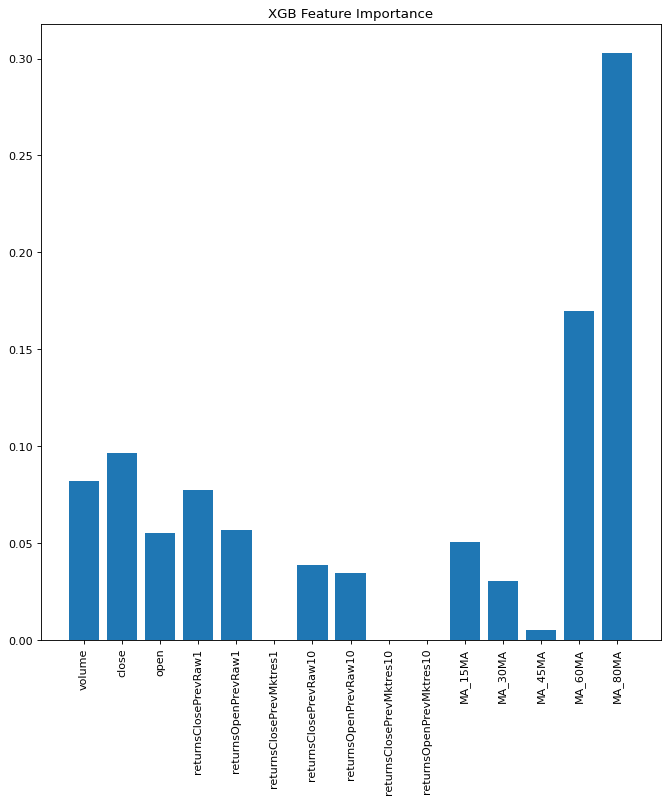

In [54]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.title("XGB Feature Importance")
plt.xticks(range(len(model.feature_importances_)), X_train.columns, rotation='vertical');

In [ ]:
test_dataframe = pd.DataFrame()
days = env.get_prediction_days()



for (market_obs_df, news_obs_df, predictions_template_df) in days:
#     test_dataframe = pd.concat([test_dataframe, market_obs_df])
   
    
    market_obs_df['MA_15MA'] = market_obs_df['close'].rolling(window=15).mean()
    market_obs_df['MA_30MA'] = market_obs_df['close'].rolling(window=30).mean()
    market_obs_df['MA_45MA'] = market_obs_df['close'].rolling(window=60).mean()
    market_obs_df['MA_60MA'] = market_obs_df['close'].rolling(window=45).mean()
    market_obs_df['MA_80MA'] = market_obs_df['close'].rolling(window=80).mean()
    
    X_test = market_obs_df[best_cols]
    
    pred_1 = model.predict_proba(X_test)
    pred_2 = model_2.predict_proba(X_test)
    pred_3 = model_3.predict_proba(X_test)
    pred_4 = model_4.predict_proba(X_test)
    
    bagged_predictions = np.zeros((X_test.shape[0],2))
    
    bagged_predictions += pred_1
    bagged_predictions += pred_2
    bagged_predictions += pred_3
    bagged_predictions += pred_4
    
    probability = bagged_predictions/4
    
    
    
    confidence = 2* probability[:,1] -1
    
    predictions_template_df.confidenceValue = confidence
    
    env.predict(predictions_template_df)
print('Done!')

env.write_submission_file()